In [110]:
# this remove warnings codes garbage text - increase readibility of file
import warnings
warnings.filterwarnings("ignore")

# library for Arrays/ CSV/ Excel Manipulation
import pandas as pd
import numpy as np

# Working with OS paths
import glob

# Visualization
import matplotlib.pyplot as plt

# library for APRIORI
from mlxtend.frequent_patterns import apriori

# Customer lifetime
import lifetimes

In [32]:
# read customer data
customer = glob.glob("*customer*.csv")[0]
customer = pd.read_csv(customer)
customer

,customer_id,cbsatitle
0,7869fea4-dcb0-4feb-9870-5bccbb8ace54,NaN
1,31b1273b-2dc6-4443-b991-dc3d0f42321d,NaN
2,ba54f9bc-6e45-4996-b648-f500ba750ae2,NaN
3,68d47a85-cd42-4d7a-810b-4fd089e24328,NaN
4,6f01c11a-b4ff-4f2a-818b-865ecde47fbb,NaN
...,...,...
12475,8e3cee8e-a485-4782-8aa5-b24d3bed6d8b,"Nashville-Davidson--Murfreesboro--Franklin, TN"
12476,2e0a8012-c503-499d-a11e-35a6a00c86ae,"Nashville-Davidson--Murfreesboro--Franklin, TN"
12477,86a1b0f8-e8f9-4270-8009-c9b3a3d338f5,"Nashville-Davidson--Murfreesboro--Franklin, TN"
12478,bd9dda16-4746-45ad-a1e2-6f9f60f798da,"Nashville-Davidson--Murfreesboro--Franklin, TN"


In [36]:
customer["cbsatitle"] = customer["cbsatitle"].fillna("Unknown, Unknown")
a = customer["cbsatitle"].str.split(", ").str
customer["state"]  = a[1]
customer

,customer_id,cbsatitle,state
0,7869fea4-dcb0-4feb-9870-5bccbb8ace54,"Unknown, Unknown",Unknown
1,31b1273b-2dc6-4443-b991-dc3d0f42321d,"Unknown, Unknown",Unknown
2,ba54f9bc-6e45-4996-b648-f500ba750ae2,"Unknown, Unknown",Unknown
3,68d47a85-cd42-4d7a-810b-4fd089e24328,"Unknown, Unknown",Unknown
4,6f01c11a-b4ff-4f2a-818b-865ecde47fbb,"Unknown, Unknown",Unknown
...,...,...,...
12475,8e3cee8e-a485-4782-8aa5-b24d3bed6d8b,"Nashville-Davidson--Murfreesboro--Franklin, TN",TN
12476,2e0a8012-c503-499d-a11e-35a6a00c86ae,"Nashville-Davidson--Murfreesboro--Franklin, TN",TN
12477,86a1b0f8-e8f9-4270-8009-c9b3a3d338f5,"Nashville-Davidson--Murfreesboro--Franklin, TN",TN
12478,bd9dda16-4746-45ad-a1e2-6f9f60f798da,"Nashville-Davidson--Murfreesboro--Franklin, TN",TN


Text(0, 0.5, 'Total Number of Customers')

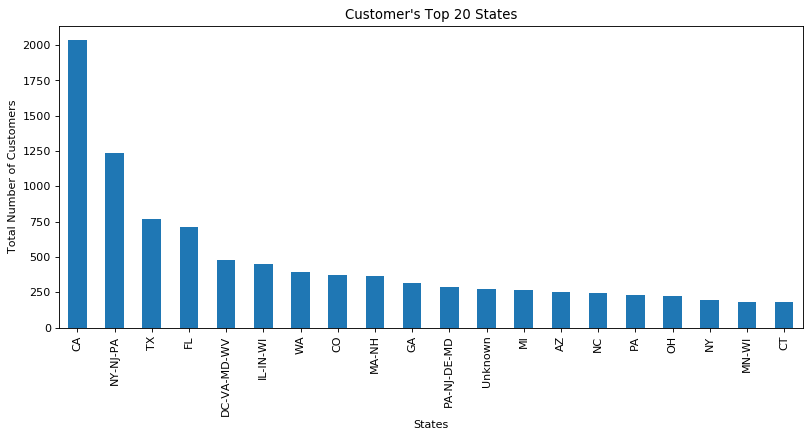

In [43]:
plt.figure(figsize=(12, 5), dpi=80)
customer["state"].value_counts().head(20).plot.bar()
plt.title("Customer's Top 20 States")
plt.xlabel("States")
plt.ylabel("Total Number of Customers")

In [50]:
# read orders data
orders = glob.glob("*order*.csv")[0]
orders = pd.read_csv(orders)
orders

,order_id,customer_id,customer_order_rank
0,62fe8263-2af2-4016-b340-e01b756e5ba6,896fab5b-ffcd-4065-8a03-9864737b1e2b,1
1,5bb654cd-1dc6-4cdd-b525-a913a5d57352,b3b64cd0-6e68-42e7-8b6c-8d0b55626b9e,1
2,fe140711-e1ee-4666-8db6-fcadc5035cd0,e00b4046-c0b9-44b0-9cb1-ceb18ec20032,1
3,9fb44724-bb94-4357-bd61-7a45f56b89ef,b1d958c1-4f7d-42b7-a29f-0947a08110e2,1
4,e2b53772-c4d9-48a3-a5fd-56f6dbc68719,22818dec-e978-4968-8a4a-75512d871198,1
...,...,...,...
25400,0a3f1340-7b20-4bf6-a2cf-0be8565f34bb,d53f122d-9e90-4dbf-b370-107010304de2,10
25401,adb922c5-2cb6-4310-a3f4-9ee710c4ee2d,21dd73c6-f81a-4869-b0e9-afab2733c1d9,10
25402,2376a7ca-8942-4666-8091-27fc98d3c336,1af9dc0a-23b9-4ae1-b8e3-b257a09bfa68,12
25403,3f8a2405-9bdc-41e5-b3f2-4e49fa6a4a84,ed31310d-fb66-4e8b-ae23-62aa23cba604,12


In [73]:
orderss = orders[["customer_id", "order_id"]].groupby(["customer_id"]).count().reset_index()
orderss = orderss.sort_values(by="order_id", ascending=False)
orderss = orderss.rename(columns={"order_id":"Totol Number of Orders"})
orderss.tail(10)

,customer_id,Totol Number of Orders
8089,a64965b0-5466-4888-af27-a4016a32eff8,1
8088,a6477c57-11a7-4169-b43f-fc0e4bd99fea,1
3415,43b344e7-ba38-4b6e-a1dc-64b0b82b3f85,1
3417,43c26062-ce4b-4dc6-b500-7515c27d856b,1
8082,a61756b6-a2d8-4be5-bc2a-364292c3edb9,1
8081,a5f8b8ef-e002-4528-8046-38ee7375a1a9,1
8080,a5f8430f-9134-4b63-87d7-a96c88d5c136,1
8076,a5dd3404-4943-4199-a66e-c6acfd8aca87,1
8075,a5dbe886-61d3-46f2-a832-f37099ff322b,1
8928,b8596e83-2320-4d79-8288-7bebdb646410,1


In [14]:
# read products data
products = glob.glob("*product*.csv")[0]
products = pd.read_csv(products)
products

,order_id,product_line,product_name
0,7448ea4c-e52e-44d9-a450-d8c58fdc47e9,Soup,Mushroom + Miso
1,422b0a3a-d782-4196-b7e6-71c0846908f0,Soup,Mushroom + Miso
2,ece26817-3ea0-4b4e-968a-459faf949ad2,Soup,Mushroom + Miso
3,5af324a7-45d5-4981-bffd-338e496d061b,Soup,Mushroom + Miso
4,1886f4dd-d941-4d53-b2d8-31b9d1709358,Soup,Mushroom + Miso
...,...,...,...
289291,1badb0b2-5f84-4005-af63-fd4b795eb04e,Harvest Bowl,Butternut Squash + Kale Shakshuka
289292,fe3da41e-1763-4a6d-9557-3951ab8e96b2,Harvest Bowl,Butternut Squash + Kale Shakshuka
289293,29246ea5-6735-4a2a-9b39-aee20201444a,Harvest Bowl,Butternut Squash + Kale Shakshuka
289294,983c0c16-9022-444e-88f7-04805dcd2cb2,Harvest Bowl,Butternut Squash + Kale Shakshuka


In [78]:
top_orders = products[["order_id", "product_line"]].groupby(["order_id"]).count().reset_index()
top_orders = top_orders.sort_values(by="product_line", ascending=False)
top_orders = top_orders.rename(columns={"product_line":"Total Number of Products"}) 
top_orders.tail(10)

,order_id,Total Number of Products
2705,1a91912a-1b47-43d2-a802-7a72db10c599,1
24416,f5ef0fc6-b119-43ae-9005-40b9e576509b,1
5857,3b09a2c9-6820-4e54-8992-b2ee2185e1ed,1
24408,f5d92c0f-13f5-4dc1-a3d0-6f6f14cca6d4,1
12899,8246f195-ec06-4ced-8bf4-b1c78a3b6b56,1
18046,b55cef61-ac4c-432c-8dc0-82a0a8e37b06,1
4947,31e1263b-5f2d-4507-8916-a5c250dc8a28,1
25031,fc689342-91cc-4cba-a0a7-f57e004cf283,1
6121,3e1a711c-bf74-46b7-b262-869341e9481b,1
892,0850397f-b3d4-48a5-86df-d23db66fea06,1


Text(0, 0.5, 'Total Number of Orders')

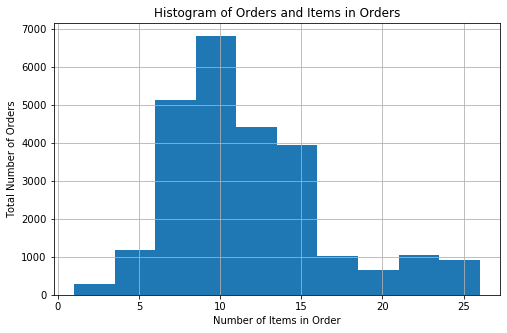

In [85]:
top_orders.hist(figsize=(8, 5))
plt.title("Histogram of Orders and Items in Orders")
plt.xlabel("Number of Items in Order")
plt.ylabel("Total Number of Orders")

Text(0, 0.5, 'Total Number of Orders for this Item')

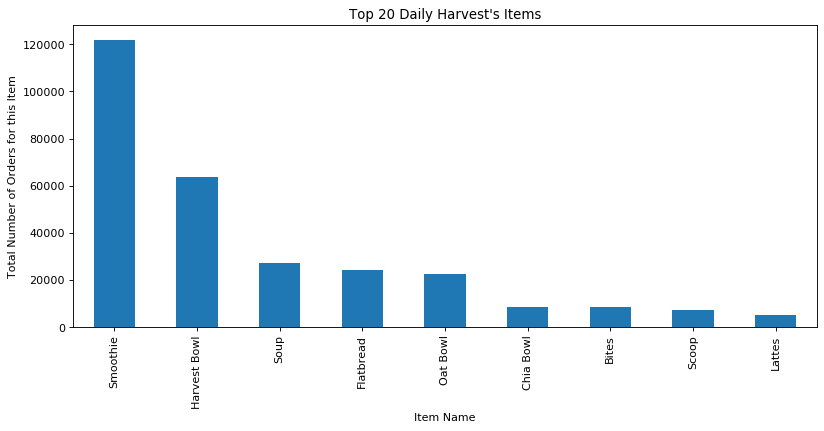

In [87]:
plt.figure(figsize=(12, 5), dpi=80)
products["product_line"].value_counts().head(20).plot.bar()
plt.title("Top 20 Daily Harvest's Items")
plt.xlabel("Item Name")
plt.ylabel("Total Number of Orders for this Item")

# Next Product Purchase

In [103]:
done = 0
dataset = []
import numpy as np
for order in set(products["order_id"].values.tolist()):
    orders = products[products["order_id"] == order]["product_name"].values.tolist()
    dataset.append(orders)
    if done == 1000:
        print("{} Completed ".format(done))
        done = 0
    else:
        done = done + 1

1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 
1000 Completed 


In [105]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
# if your dataframe is normal

d = np.array(dataset)

small_size_dataframe = False
if small_size_dataframe is False:
    oht_ary = te.fit(d).transform(d, sparse=True)
    df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
else:
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Acai + Cherry,Apple + Cinnamon,Artichoke + Lemon,Artichoke + Spinach,Banana + Greens,Beet + Avocado Poké,Black Sesame + Banana,Blackberry + Majik,Blueberry + Hemp,Blueberry + Lemon,...,Tomato + Basil,Tomato + Bell Pepper Gazpacho,Tomato + Cremini,Tomato + Zucchini Minestrone,Turmeric + Lemongrass Broth,"Vanilla + Salted, Swirled Black Sesame","Vanilla + Sticky, Sweet, Salted Caramel",Vanilla Bean + Apple,Vanilla Bean + Cacao,Watermelon + Dragon Fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
25401,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
25402,1,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
25403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.417162,(Acai + Cherry)
1,0.177642,(Apple + Cinnamon)
2,0.119819,(Artichoke + Lemon)
3,0.259516,(Artichoke + Spinach)
4,0.180673,(Banana + Greens)
...,...,...
7990,0.013462,"(Vanilla Bean + Apple, Watermelon + Dragon Fru..."
7991,0.019760,"(Watermelon + Dragon Fruit, Vanilla Bean + Cac..."
7992,0.011140,"(Sweet Potato + Wild Rice Hash, Tomatillo + Pe..."
7993,0.014289,"(Vanilla Bean + Cacao, Watermelon + Dragon Fru..."


In [112]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana + Greens),(Acai + Cherry),0.180673,0.417162,0.096202,0.532462,1.276391,0.020832,1.246611
1,(Acai + Cherry),(Banana + Greens),0.417162,0.180673,0.096202,0.230610,1.276391,0.020832,1.064904
2,(Black Sesame + Banana),(Acai + Cherry),0.076087,0.417162,0.040110,0.527160,1.263681,0.008369,1.232632
3,(Acai + Cherry),(Black Sesame + Banana),0.417162,0.076087,0.040110,0.096150,1.263681,0.008369,1.022197
4,(Blueberry + Hemp),(Acai + Cherry),0.142767,0.417162,0.080339,0.562724,1.348934,0.020781,1.332884
...,...,...,...,...,...,...,...,...,...
28349,"(Tomatillo + Pepper, Tomato + Cremini)",(Tomato + Zucchini Minestrone),0.050738,0.213541,0.015391,0.303336,1.420507,0.004556,1.128893
28350,"(Tomato + Cremini, Tomato + Zucchini Minestrone)",(Tomatillo + Pepper),0.038378,0.157449,0.015391,0.401026,2.547014,0.009348,1.406656
28351,(Tomatillo + Pepper),"(Tomato + Cremini, Tomato + Zucchini Minestrone)",0.157449,0.038378,0.015391,0.097750,2.547014,0.009348,1.065804
28352,(Tomato + Zucchini Minestrone),"(Tomatillo + Pepper, Tomato + Cremini)",0.213541,0.050738,0.015391,0.072074,1.420507,0.004556,1.022993


In [121]:
rec_1089 = rules.loc[rules['antecedents'] == frozenset({"Banana + Greens"})]
rec_1089 = rec_1089.sort_values(by="lift", ascending=False)
rec_1089

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9237,(Banana + Greens),"(Cucumber + Greens, Black Sesame + Banana)",0.180673,0.020390,0.013659,0.075599,3.707714,0.009975,1.059725
9249,(Banana + Greens),"(Mango + Greens, Black Sesame + Banana)",0.180673,0.029994,0.017792,0.098475,3.283144,0.012373,1.075961
9463,(Banana + Greens),"(Cucumber + Greens, Cacao + Avocado)",0.180673,0.028144,0.016257,0.089978,3.197058,0.011172,1.067948
10175,(Banana + Greens),"(Cucumber + Greens, Passion Fruit + Greens)",0.180673,0.040189,0.023145,0.128105,3.187558,0.015884,1.100833
10196,(Banana + Greens),"(Cucumber + Greens, Vanilla Bean + Cacao)",0.180673,0.022673,0.012714,0.070370,3.103749,0.008618,1.051308
...,...,...,...,...,...,...,...,...,...
2363,(Banana + Greens),"(Acai + Cherry, Cinnamon + Banana)",0.180673,0.058729,0.013344,0.073856,1.257585,0.002733,1.016334
10451,(Banana + Greens),"(Mint + Cacao, Strawberry + Peach)",0.180673,0.143594,0.032198,0.178214,1.241095,0.006255,1.042127
9876,(Banana + Greens),"(Mint + Cacao, Chocolate + Blueberry)",0.180673,0.143436,0.032120,0.177778,1.239419,0.006205,1.041767
279,(Banana + Greens),(Mint + Cacao),0.180673,0.258611,0.057666,0.319172,1.234181,0.010942,1.088953


In [133]:
import random

random_choices = []
for i in rules['antecedents'].values:
    for j in list(i):
        if j not in random_choices:
            random_choices.append(j)
            
have = random.choice(random_choices)

rec_1089 = rules.loc[rules['antecedents'] == frozenset({have})]
rec_1089 = rec_1089.sort_values(by="lift", ascending=False)


likely_to_buy = []
for i in rec_1089["consequents"].values:
    for j in list(i):
        if j not in likely_to_buy:
            likely_to_buy.append(j)

print("if someone have {}".format(have))

print("\n\nThey more likely to buy:-")
for i in likely_to_buy[0:10]:
    print(i)

if someone have Blueberry + Lemon


They more likely to buy:-
Apple + Cinnamon
Cinnamon + Banana
Cherry + Dark Chocolate
Blackberry + Majik
Pumpkin + Chai
Vanilla Bean + Apple
Sweet Potato + Wild Rice Hash
Mulberry + Dragon Fruit
Chocolate + Almond


# Customer Lifetime Value Example

In [161]:
from lifetimes.datasets import load_cdnow_summary_data_with_monetary_value
summary = load_cdnow_summary_data_with_monetary_value()
summary

,frequency,recency,T,monetary_value
customer_id,,,,
1,2,30.43,38.86,22.35
2,1,1.71,38.86,11.77
3,0,0.00,38.86,0.00
4,0,0.00,38.86,0.00
5,0,0.00,38.86,0.00
...,...,...,...,...
2353,0,0.00,27.00,0.00
2354,5,24.29,27.00,44.93
2355,0,0.00,27.00,0.00


In [162]:
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.242593,0.012557,0.217981,0.267205
alpha,4.413532,0.378221,3.672218,5.154846
a,0.792886,0.185719,0.428877,1.156895
b,2.425752,0.705345,1.043276,3.808229


In [163]:
summary["probability_alive"] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,frequency,recency,T,monetary_value,probability_alive
customer_id,,,,,
1,2,30.43,38.86,22.35,0.726609
2,1,1.71,38.86,11.77,0.212227
3,0,0.00,38.86,0.00,1.000000
4,0,0.00,38.86,0.00,1.000000
5,0,0.00,38.86,0.00,1.000000
6,7,29.43,38.86,73.74,0.641801
7,1,5.00,38.86,11.77,0.314918
8,0,0.00,38.86,0.00,1.000000
9,2,35.71,38.86,25.55,0.784808


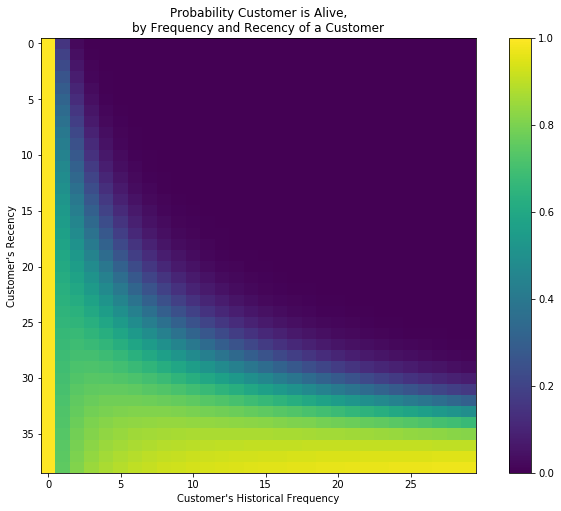

In [164]:
from lifetimes.plotting import plot_probability_alive_matrix
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 8))
plot_probability_alive_matrix(bgf)

In [165]:
t = 30
summary["Predicted_Number_of_Transactions"] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']), 2)
summary["Predicted_Number_of_Transactions"] = round(summary["Predicted_Number_of_Transactions"])
summary.sort_values(by="Predicted_Number_of_Transactions", ascending=False).head(10).reset_index()

,customer_id,frequency,recency,T,monetary_value,probability_alive,Predicted_Number_of_Transactions
0,1516,26,30.86,31.00,39.97,0.968920,17.0
1,157,29,37.71,38.00,26.26,0.969134,16.0
2,1981,17,28.43,28.86,48.23,0.948901,11.0
3,841,19,34.00,34.14,29.49,0.960031,11.0
4,509,18,35.14,35.86,78.63,0.946322,10.0
5,1413,14,30.29,31.57,19.01,0.920726,9.0
6,1539,14,29.86,30.86,18.13,0.928143,9.0
7,813,13,33.86,34.29,28.62,0.940090,8.0
8,693,13,34.43,35.00,42.44,0.937507,8.0
9,1081,11,32.00,33.14,106.53,0.917228,7.0


In [166]:
return_customers_summary = summary[summary['frequency'] > 0]
print("There are {} Number of Returning Customers".format(return_customers_summary.shape[0]))
return_customers_summary.head()

There are 946 Number of Returning Customers


,frequency,recency,T,monetary_value,probability_alive,Predicted_Number_of_Transactions
customer_id,,,,,,
1,2,30.43,38.86,22.35,0.726609,1.0
2,1,1.71,38.86,11.77,0.212227,0.0
6,7,29.43,38.86,73.74,0.641801,3.0
7,1,5.00,38.86,11.77,0.314918,0.0
9,2,35.71,38.86,25.55,0.784808,1.0


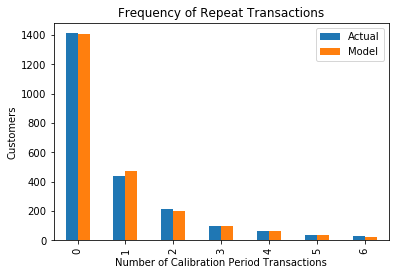

In [167]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [168]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'], return_customers_summary['monetary_value'])
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,7.912025,0.390643,7.146365,8.677685
q,2.446819,0.111667,2.227953,2.665686
v,7.209564,0.412916,6.400248,8.018880


In [172]:
summary = summary[summary['monetary_value'] > 0]
summary['expected_average_sales'] = ggf.conditional_expected_average_profit(summary['frequency'], summary['monetary_value'])
summary['expected_average_sales'] = round(summary['expected_average_sales'])
summary.head()

,frequency,recency,T,monetary_value,probability_alive,Predicted_Number_of_Transactions,expected_average_sales,predicted_LTV
customer_id,,,,,,,,
1,2,30.43,38.86,22.35,0.726609,1.0,24.0,23.014807
2,1,1.71,38.86,11.77,0.212227,0.0,16.0,2.563004
6,7,29.43,38.86,73.74,0.641801,3.0,73.0,193.574033
7,1,5.00,38.86,11.77,0.314918,0.0,16.0,3.803170
9,2,35.71,38.86,25.55,0.784808,1.0,27.0,27.923000


In [173]:
print("Expected Average Sales: ${}".format(summary['expected_average_sales'].mean()))
print("Actual Average Sales: ${}".format(summary['monetary_value'].mean()))

Expected Average Sales: $35.678646934460886
Actual Average Sales: $35.07855179704026


In [174]:
summary['predicted_LTV'] = ggf.customer_lifetime_value(bgf, summary['frequency'],
                                                      summary['recency'],
                                                      summary['T'],
                                                      summary['monetary_value'],
                                                      time=1,
                                                      freq='D',
                                                      discount_rate=0.01)
summary.head()

,frequency,recency,T,monetary_value,probability_alive,Predicted_Number_of_Transactions,expected_average_sales,predicted_LTV
customer_id,,,,,,,,
1,2,30.43,38.86,22.35,0.726609,1.0,24.0,23.014807
2,1,1.71,38.86,11.77,0.212227,0.0,16.0,2.563004
6,7,29.43,38.86,73.74,0.641801,3.0,73.0,193.574033
7,1,5.00,38.86,11.77,0.314918,0.0,16.0,3.803170
9,2,35.71,38.86,25.55,0.784808,1.0,27.0,27.923000


In [175]:
profit_margin = 0.05
summary["LTV"] = summary['predicted_LTV'] * profit_margin
summary.head()

,frequency,recency,T,monetary_value,probability_alive,Predicted_Number_of_Transactions,expected_average_sales,predicted_LTV,LTV
customer_id,,,,,,,,,
1,2,30.43,38.86,22.35,0.726609,1.0,24.0,23.014807,1.150740
2,1,1.71,38.86,11.77,0.212227,0.0,16.0,2.563004,0.128150
6,7,29.43,38.86,73.74,0.641801,3.0,73.0,193.574033,9.678702
7,1,5.00,38.86,11.77,0.314918,0.0,16.0,3.803170,0.190159
9,2,35.71,38.86,25.55,0.784808,1.0,27.0,27.923000,1.396150
